## Implicit-Explicit finite difference schemes for the advection-diffusion equation
[Connor P. Duffin](https://connorpduffin.github.io), *The Unversity of Western Australia*.

This is a brief description of a method of implementing an *implicit-explicit* (IMEX) finite difference scheme for the advection-diffusion equation:
\begin{equation}
  u_t = u_x + u_{xx}, \quad \text{ for } u \in [0, 1] \times \mathbb{R}^+, \label{eq:adv-diff}
  \end{equation}
subject to the boundary and initial conditions:
\begin{equation*}
  u(x, 0) = \sin(\pi x), \, u(0, t) = u(1, t) = 0. \nonumber
\end{equation*}
IMEX methods are used when we have two parts of a PDE that are individually suited to different forms of finite differencing (i.e. one part is prone to numerical problems, and the other is difficult to solve). In learning these methods, I found that there were not many well-documented implementations available for practitioners on the internet. Whilst not claiming to be well-documented, I hope this is able to help someone who is trying to learn this stuff for the first time. We start by presenting the details of IMEX schemes, before moving onto the advection-diffusion equation. We then derive the finite difference scheme of interest, and implement it in `Python`. We conclude with a presentation of the resulting output.

### IMEX schemes
As in the very good article by [Ascher et. al.](https://epubs.siam.org/doi/abs/10.1137/0732037) consider a (time-dependent) PDE of the form:
\begin{equation*}
  u_t = f(u) + g(u)
\end{equation*}
where $f$ and $g$ may be differential operators, but we will just think of them as functions (for now). This allows us to borrow techniques from the ODE solving literature. Assume that $f$ may be nonlinear, so we would like to avoid solving any nonlinear equations. We will use an *explicit* routine, therefore, for these terms. We will also assume that $g$ is stiff, and integrating this part of the equation using typical explicit schemes is not very stable. For these terms, we will use an *implicit* routine.

#### The explicit scheme
First, let's look at the system in terms of just $f$. Suppose that we had a equation to solve, explicitly, that looks like
\begin{equation*}
  u_t = f(u).
\end{equation*}
Remember that in order to solve an equation explicitly, we will solve the equation only in terms of previous values (that we know). The explicit solution method that we are interested in will actually be a method of solving ODE's, called the [Adams-Bashfourth method](https://en.wikipedia.org/wiki/Linear_multistep_method#Adams%E2%80%93Bashforth_methods). The Adams-Bashfourth method belongs to a family of methods that are available to solve ODE's using more than a single timestep. These general methods are of the form:
\begin{equation*}
  y_{n + 1} = y_n + \Delta t \left(a_1 y_{n - 1} + a_2 y_{n - 2} + a_3 y_{n - 3} + \cdots\right),
\end{equation*}
for some coefficients $a_k$, $k = 1, 2, \ldots$. The second-order Adams-Bashfourth method is of the form:
\begin{equation*}
  y_{n + 1} = y_n + \Delta t \left(\frac{3}{2} f(y_{n - 1}) - \frac{1}{2} f(y_{n - 2})\right),
\end{equation*}
and, for us, this gives the approximation:
\begin{equation*}
  u_t \approx \frac{u^{n + 1} - u^n}{\Delta t} = \left(\frac{3}{2} f(u^{n}) - \frac{1}{2} f(u^{n - 1})\right).
\end{equation*}
Notice the use of a forward-time difference estimate of the derivative.

#### The implicit scheme
For the function $g$, remember that we want to use an explicit method of solution. Like the example above, for $f$, we will first consider solving:
\begin{equation*}
  u_t = g(u).
\end{equation*}
Whilst not completely explicit, the [Crank-Nicholson](https://en.wikipedia.org/wiki/Crank%E2%80%93Nicolson_method) scheme is popular and very well studied (at the time of writing Crank-Nicholson returns over 28,000 results on Google Scholar). We evaluate $f$ at (discrete) time points $n$ and $n + 1$, and average over these values. This gives the discretisation:
\begin{equation*}
  u_t \approx \frac{u^{n + 1} - u^n}{\Delta t} = \frac{1}{2}\left(g(u^{n + 1}) + g(u^n)\right),
\end{equation*}
where we have again made use of a forward-time finite difference estimate of the time derivative.


#### Putting these together
Using both of these methods into solving our PDE of interest gives:
\begin{equation*}
  \frac{u_i^{n +1} - u_i^n}{\Delta t} 
  = \frac{3}{2} f(u^{n}) - \frac{1}{2} f(u^{n - 1}) 
  + \frac{1}{2} \left(g(u^{n + 1}) + g(u^n)\right).
\end{equation*}

Which is a our building block equation for the rest of this paper. We remember that in the advection-diffusion we have both $u_x$ and $u_{xx}$ terms. Represent each of these with centered-space finite differences to get:
\begin{align*}
  \frac{u_i^{n + 1} - u_i^n}{\Delta t}
  &= \frac{3}{2} \frac{u_{i + 1}^{n} - u_{i - 1}^{n}}{2 \Delta x}
  - \frac{1}{2} \frac{u_{i + 1}^{n - 1} - u_{i - 1}^{n - 1}}{2 \Delta x}
  + \frac{1}{2}\left(\frac{u_{i + 1}^{n + 1} - 2 u_{i + 1}^{n + 1} + u_{i + 1}^{n + 1}}{(\Delta x)^2}
  - \frac{u_{i + 1}^{n} - 2 u_{i + 1}^{n} + u_{i + 1}^{n}}{(\Delta x)^2} \right) \\
  u_i^{n + 1} - u_i^n &= \frac{3 \Delta t}{4 \Delta x} (u_{i + 1}^{n} - u_{i - 1}^{n})
  - \frac{\Delta t}{4 \Delta x} (u_{i + 1}^{n - 1} - u_{i - 1}^{n - 1})
  + \frac{\Delta t}{2 (\Delta x)^2}\left(u_{i + 1}^{n + 1} - 2 u_{i + 1}^{n + 1} + u_{i + 1}^{n + 1}
  - u_{i + 1}^{n} - 2 u_{i + 1}^{n} + u_{i + 1}^{n} \right)
\end{align*}

Now move all of the terms that have time $n + 1$ to the LHS, and move all of the terms that have a times $n$ and $n - 1$ to the RHS. This gives:

\begin{align*}
  - \frac{\Delta t}{2 (\Delta x)^2} u_{i - 1}^{n + 1} 
  + \left(1 + \frac{\Delta t}{(\Delta x)^2}\right) u_i^{n + 1}
  - \frac{\Delta t}{2 (\Delta x)^2} u_{i + 1}^{n + 1} \\
  = \left(\frac{\Delta t}{2 (\Delta x)^2} - \frac{3 \Delta t}{4 \Delta x} \right) u_{i - 1}^{n}
  + (1 - \frac{\Delta t}{(\Delta x)^2}) u_i^n
  + \left(\frac{\Delta t}{2 (\Delta x)^2} + \frac{3 \Delta t}{4 \Delta x}\right) u_{i + 1}^{n} \\
  + \frac{\Delta t}{4 \Delta x} u_{i - 1}^{n - 1} - \frac{\Delta t}{4 \Delta x} u_{i + 1}^{n - 1}
\end{align*}

Which can be represented by a set of matrix equations, to save us some notational hassle. Let $\mathbf u^n$ represent the vector $(u_0, u_1, \ldots, u_N)^\top$, and we have:
\begin{align*}
  \mathbf A \mathbf u^{n + 1} = \mathbf B \mathbf u^n + \mathbf C \mathbf u^{n - 1},
\end{align*}
where matrices $\mathbf A$, $\mathbf B$, $\mathbf C$ are given by the tridiagonal matrices:
\begin{align*}
   \mathbf A &= 
   \mathrm{tridiag}\left(
     \frac{\Delta t}{2 (\Delta x)^2}, 1 + \frac{\Delta t}{(\Delta x)^2}, \frac{\Delta t}{2 (\Delta x)^2} 
   \right) \\
   \mathbf B &= \mathrm{tridiag}\left(
     \frac{\Delta t}{2 (\Delta x)^2} - \frac{3 \Delta t}{4 \Delta x}, 1 - \frac{\Delta t}{(\Delta x)^2}, \frac{\Delta t}{2 (\Delta x)^2} + \frac{3 \Delta t}{4 \Delta x}
   \right) \\
   \mathbf C &= \mathrm{tridiag}\left(
     \frac{\Delta t}{4 \Delta x}, 0, -\frac{\Delta t}{4 \Delta x}
   \right)
 \end{align*}
 
Remember that the RHS is completely known, and requires two matrix multiplication operations (complexity $\mathcal O(N^2)$). This leaves us with a standard linear system to solve, i.e. $ \mathbf A \mathbf u^{n + 1} = \mathbf b$. For our tridiagonal system, this has complexity $\mathcal O(n)$.

This is all the background required. Let's move onto the implementation.

### Computing
I have written up the scheme using the [SciPy](https://scipy.org/) stack. Let's start by loading everything that we need:

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
import scipy.sparse as sparse

from mpl_toolkits.mplot3d import Axes3D
from scipy.sparse.linalg import spsolve

Now let's define some constants that we will need:

In [2]:
dx = 0.001
dt = 0.001
x = np.arange(0, 1, dx)
t = np.arange(0, 1, dt)
n_x = len(x)
n_t = len(t)

We will use an equally spaced grid in $x$ and time, and march through up to time $t = 1$. Let's now create a matrix to save our initial values and define our initial profile, along with a nice plot:

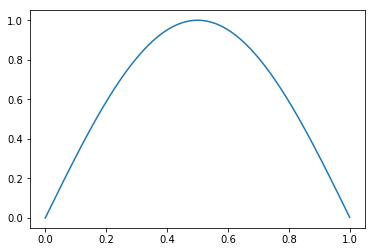

In [3]:
u = np.zeros([n_x, n_t])
u[:, 0] = np.sin(np.pi * x)
plt.plot(x, u[:, 0])

Notice that this initial profile automatically follows our boundary constraints (which is why I chose it). You will have probably noticed that in order to actually run the IMEX solver, we will need *two* sets of initial conditions -- one at time $t = 0$ and another at time $t = \Delta t$. To get this, we will just use an explicit finite difference scheme to iterate this once. I initially had an explicit solver, but that was numerically unstable and removed the benefit of the IMEX scheme. Our explicit solver computes the following approximation:
\begin{equation}
  \frac{u_i^{n + 1} - u_i^{n}}{\Delta t}
  = \frac{u_{i + 1}^{n + 1} - u_{i - 1}^{n + 1}}{2 \Delta x}
  + \frac{u_{i + 1}^{n + 1} - 2 u_i^{n + 1} + u_{i - 1}^{n + 1}}{(\Delta x)^2},
\end{equation}
and again involves solving a tridiagonal system. This is implemented using the sparse matrix module from `numpy`:

In [4]:
implicit_matrix = sparse.diags(
    diagonals=[
        np.full(n_x - 1, dt / (2 * dx) - dt / (dx**2)),
        np.full(n_x, 1 + 2 * dt / (dx**2)),
        np.full(n_x - 1, -dt / (2 * dx) - dt / (dx**2)),
    ],
    offsets=[-1, 0, 1],
    format="csr"
)

start_time = time.time()
u[:, 1] = spsolve(implicit_matrix, u[:, 0])
time_solve = time.time() - start_time
print(f"{n_x} by {n_x} system took {time_solve} s to solve")

1000 by 1000 system took 0.001539468765258789 s to solve


We need to use the `csr` format to store the sparse matrix as `spsolve` requires that the input matrix be either `csc` or `csr`. As I was testing out the `lsqr` function whilst setting up the code (and `lsqr` can only take `csr` matrices), I had the matrices stored in this form. Next, let's define our IMEX matrices ($\mathbf A$, $\mathbf B$, and $\mathbf C$ respectively):

In [5]:
imex_lhs_matrix = sparse.diags(
    diagonals=[
        np.full(n_x - 1, -dt / (2 * dx**2)),
        np.full(n_x, 1 + dt / (dx ** 2)),
        np.full(n_x - 1, -dt / (2 * dx**2))
    ],
    offsets=[-1, 0, 1],
    format="csr"
)
imex_rhs_curr = sparse.diags(
    diagonals=[
        np.full(n_x - 1, - 3 * dt / (4 * dx) + dt / (2 * dx**2)),
        np.full(n_x, 1 - dt / (dx**2)),
        np.full(n_x - 1, 3 * dt / (4 * dx) + dt / (2 * dx**2)),
    ],
    offsets=[-1, 0, 1],
    format="csr"
)
imex_rhs_prev = sparse.diags(
    diagonals=[
        np.full(n_x - 1, dt / (4 * dx)),
        np.full(n_x - 1, -dt / (4 * dx)),
    ],
    offsets=[-1, 1],
    format="csr"
)

Now we can march through time in our IMEX scheme:

1000 by 1000 grid took 0.6208689212799072 s to evaluate


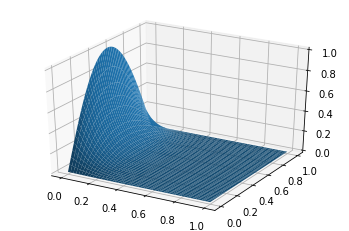

In [6]:
start_time = time.time()
for i in range(2, n_t):
    u[:, i] = spsolve(
        imex_lhs_matrix,
        imex_rhs_curr @ u[:, i - 1] + imex_rhs_prev @ u[:, i - 2]
    )

time_imex = time.time() - start_time
print(f"{n_x} by {n_t} grid took {time_imex} s to evaluate")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_grid, t_grid = np.meshgrid(x, t)
ax.plot_surface(t_grid, x_grid, u.transpose())
plt.show()